In [179]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [180]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [181]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, select
# from sqlalchemy import create_engine, inspect

In [182]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [183]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [184]:
Station_columns = inspector.get_columns('station')
for column in Station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [185]:
# View all of the classes that automap found
Msr_columns = inspector.get_columns('measurement')
for column in Msr_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [186]:
# Save references to each table
Msr = Base.classes.measurement
Station = Base.classes.station

In [187]:
M_first_row = session.query(Msr).first()
M_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fde1b7e5ee0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

In [188]:
S_first_row = session.query(Station).first()
S_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fde1b974610>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

In [189]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [190]:
# Find the most recent date in the data set.
new_date= session.query(Msr.date).order_by(Msr.date.desc()).first()
new_date

('2017-08-23',)

In [191]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


# Perform a query to retrieve the data and precipitation scores
date = dt.datetime(2016, 8, 23)
year_perc= session.query(Msr.date, Msr.prcp).\
    filter(Msr.date >= date).all()
year_perc

# # Save the query results as a Pandas DataFrame and set the index to the date column
rows = [{"Date": result[0], "Percipitation": result[1]} for result in year_perc]
rows
DF= pd.DataFrame(rows)
DF

# # Sort the dataframe by date
DF.sort_values(by='Date').set_index('Date', inplace=True)
DF
DF.sort_values('Date')
sort= DF.set_index('Date')
sort

Query Date:  2016-08-23


,Percipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


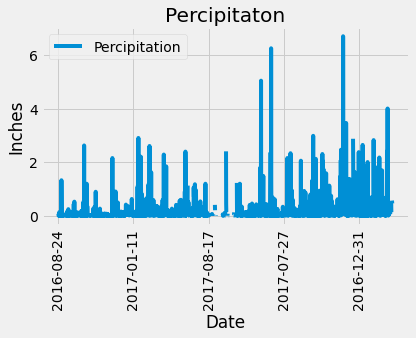

In [192]:
# # # Use Pandas Plotting with Matplotlib to plot the data
sort.plot.line(y= 'Percipitation', xlabel='Date',ylabel='Inches', title = "Percipitaton")
#plt.figure(figsize=(10, 6))

plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

# Not plotting sorted*************************************

In [196]:
# Use Pandas to calculate the summary statistics for the precipitation data
DF.describe()

,Percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [197]:
# Design a query to calculate the total number stations in the dataset
sta_count = session.query(func.distinct(Station.station)).count()
print(sta_count)

9


In [199]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order. 
session.query(Msr.station, func.count(Msr.station)).\
    group_by(Msr.station).\
    order_by(func.count(Msr.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [200]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.max(Msr.tobs), 
       func.min(Msr.tobs), 
       func.avg(Msr.tobs)]
busy = session.query(*sel).\
    filter((Msr.station) == "USC00519281").all()
busy

[(85.0, 54.0, 71.66378066378067)]

In [216]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(Msr.tobs).filter(Msr.date <= '2017-08-23').\
        filter(Msr.date >= '2016-08-23').\
        filter((Msr.station) == "USC00519281").all()
temp

# # Load the list comprehension rows into a dataframe, set the index to the date, and plot the PTPs
# df = pd.DataFrame(temp, columns=['tobs'])
# df.plot.hist(bins=12)
# plt.tight_layout()
# plt.xlabel("Temperature")
# plt.show

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


# Close session

In [150]:
# Close Session
session.close()

## Resources

#### filter between dates in SqlAlchemy:
https://www.codegrepper.com/code-examples/python/sqlalchemy+filter+between+dates

#### select distinct values in SqlAlchemy:
https://stackoverflow.com/questions/2175355/selecting-distinct-column-values-in-sqlalchemy-elixir

#### counting distinct data in SqlAlchemy:
https://campus.datacamp.com/courses/introduction-to-relational-databases-in-python/applying-filtering-ordering-and-grouping-to-queries?ex=11